# Checkerboard test

Test the algorithm sensitivity on a checkerboard synthetic field.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import verde as vd
from vectorspline3d import VectorSpline3D

In [24]:
region = (0, 5000, -5000, 0)
checker = vd.datasets.CheckerBoard(region=region, amplitude=1e2, w_east=1500, w_north=1500)
force_coords = [i.ravel() for i in vd.grid_coordinates(region, spacing=100)]
checker_spline = VectorSpline3D(force_coords=force_coords, depth=10)
coordinates = vd.scatter_points(region, 1000)
checker_spline.force_ = np.concatenate([checker.predict(force_coords).ravel()]*3)
data = checker_spline.predict(coordinates)

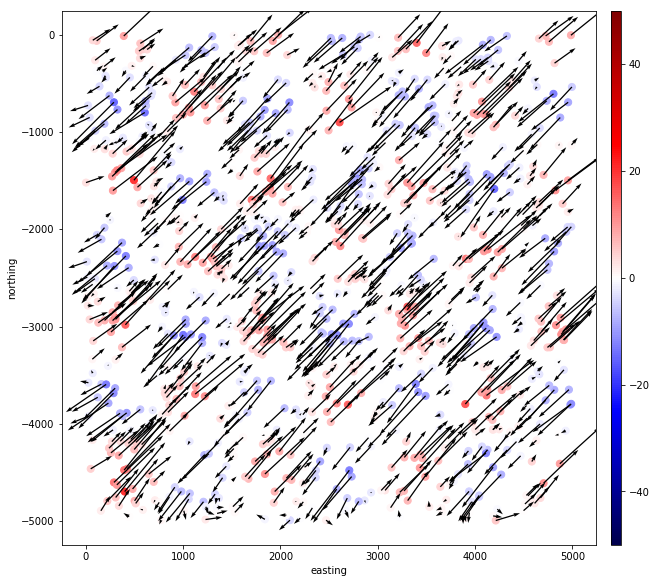

In [25]:
plt.figure(figsize=(10, 8.2))
maxabs = 50 #vd.maxabs(data[-1])
plt.scatter(*coordinates, c=data[-1], s=50, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(pad=0.01, aspect=50)
plt.quiver(*coordinates, *data[:2], scale=200)
plt.axis('scaled')
plt.xlabel('easting')
plt.ylabel('northing')
plt.tight_layout()

In [26]:
#spline = VectorSpline3D(damping=1e-8, poisson=0.5, depth=10).fit(coordinates, data)
spline = vd.Vector([vd.Spline(damping=1e-9, mindist=1e1) for i in range(3)]).fit(coordinates, data)
spline.score(coordinates, data)

0.9945937162805368

In [27]:
grid = spline.grid(region=region, spacing=100)
true_grid = checker_spline.grid(region=region, spacing=100)

In [28]:
def plot_grid(grid):
    plt.figure()
    ax = plt.subplot(111)
    grid.vertical_component.plot.pcolormesh(ax=ax, cmap="seismic", vmin=-maxabs, vmax=maxabs)
    ax.quiver(grid.easting, grid.northing, grid.east_component, grid.north_component, scale=200)
   # plt.axis('scaled')
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.tight_layout()

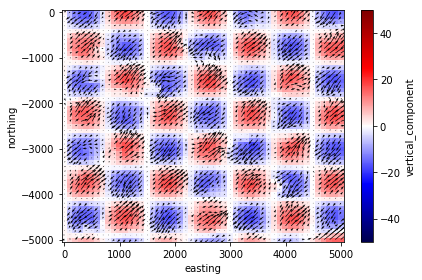

In [29]:
plot_grid(grid - true_grid)

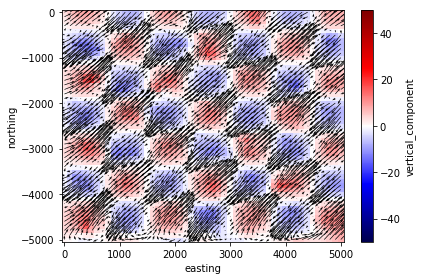

In [30]:
plot_grid(grid)